In [ ]:
from matplotlib import pyplot as plt
from typing import List, Tuple

In [ ]:
def plot_map(ax):
    # limite de calles
    color = "black"
    left_top_corner_x = [0, 10, 10]
    left_top_corner_y = [30, 30, 40]

    right_top_corner_x = [30, 30, 40]
    right_top_corner_y = [40, 30, 30]

    left_bot_corner_x = [0, 10, 10]
    left_bot_corner_y = [10, 10, 0]

    right_bot_corner_x = [30, 30, 35, 40]
    right_bot_corner_y = [0, 10, 10, 15]


    ax.plot(left_top_corner_x, left_top_corner_y, color)
    ax.plot(right_top_corner_x, right_top_corner_y, color)
    ax.plot(left_bot_corner_x, left_bot_corner_y, color)
    ax.plot(right_bot_corner_x, right_bot_corner_y, color)

    # lineas amarillas
    color = "orange"
    top_x = [20, 20]
    top_y = [40, 30]

    left_x = [0, 10]
    left_y = [20, 20]

    right_x = [30, 40]
    right_y = [20, 20]

    bot_x = [20, 20]
    bot_y = [10, 0]

    ax.plot(top_x, top_y, color)
    ax.plot(left_x, left_y, color)
    ax.plot(right_x, right_y, color)
    ax.plot(bot_x, bot_y, color)

    # carriles
    color = "black"
    v_lane_left_x = [15, 15]
    v_lane_right_x = [25, 25]
    top_v_lane_y = [40, 30]
    bot_v_lane_y = [10, 0]

    left_h_lane_x = [0, 10]
    right_h_lane_x = [30, 40]
    h_lane_top_y = [25, 25]
    h_lane_bot_y = [15, 15]

    ax.plot(v_lane_left_x, top_v_lane_y, color, linestyle="--")
    ax.plot(v_lane_right_x, top_v_lane_y, color, linestyle="--")
    ax.plot(v_lane_left_x, bot_v_lane_y, color, linestyle="--")
    ax.plot(v_lane_right_x, bot_v_lane_y, color, linestyle="--")
    ax.plot(left_h_lane_x, h_lane_top_y, color, linestyle="--")
    ax.plot(left_h_lane_x, h_lane_bot_y, color, linestyle="--")
    ax.plot(right_h_lane_x, h_lane_top_y, color, linestyle="--")
    ax.plot(right_h_lane_x, h_lane_bot_y, color, linestyle="--")

In [103]:
class route:
    x:List[float]
    y:List[float]
    points:List[Tuple[float,float]]

    def __init__(self, x:List[float], y:List[float]):
        self.x = x
        self.y = y
        self.points = []
        self.__save_as_points()

    def __save_as_points(self):
        for i in range(len(self.x)):
            self.points.append((self.x[i], self.y[i]))

bot_routes:List[route] = [
    route([27.5, 27.5, 40], [0, 17.5, 17.5]),
    route([27.5, 27.5], [0, 40]),
    route([22.5, 22.5, 0], [0, 27.5, 27.5]),
    route([22.5, 22.5, 0], [0, 22.5, 22.5]),
    route([22.5, 22.5], [0, 40])
]

left_routes:List[route] = [
    route([0, 12.5, 12.5], [12.5, 12.5, 0]),
    route([0, 17.5, 17.5], [12.5, 12.5, 0]),
    route([0, 40], [17.5, 17.5]),
    route([0, 27.5, 27.5], [17.5, 17.5, 40]),
    route([0, 22.5, 22.5], [17.5, 17.5, 40])
]

top_routes:List[route] = [
    route([12.5, 12.5], [40, 0]),
    route([12.5, 12.5, 0], [40, 27.5, 27.5]),
    route([12.5, 12.5, 0], [40, 22.5, 22.5]),
    route([17.5, 17.5, 40], [40, 17.5, 17.5]),
    route([17.5, 17.5], [40, 0])
]

right_routes:List[route] = [
    route([40, 27.5, 27.5], [27.5, 27.5, 40]),
    route([40, 22.5, 22.5], [27.5, 27.5, 40]),
    route([40, 0], [27.5, 27.5]),
    route([40, 0], [22.5, 22.5]),
    route([40, 17.5, 17.5], [22.5, 22.5, 0]),
    route([40, 12.5, 12.5], [22.5, 22.5, 0])
]

routes = [top_routes, right_routes, bot_routes, left_routes]
route_colors = ["blue", "red", "green", "purple"]

In [102]:
class semaforo:
    color:str = "green"
    pos:Tuple[float, float] = (0, 0)
    phase_duration = 0
    r = 1

    def __init__(self, pos):
        self.pos = pos

semaforos:List[semaforo] = [
    semaforo((7.5, 32.5)),
    semaforo((32.5, 32.5)),
    semaforo((32.5, 7.5)),
    semaforo((7.5, 7.5)),
]

def plot_semaforos(ax, active:int, color:str):
    for i in range(len(semaforos)):
        if i == active:
            semaforos[i].color = color

        else :
            semaforos[i].color = "red"

        circle = plt.Circle(semaforos[i].pos, semaforos[i].r, color=semaforos[i].color)
        ax.add_patch(circle)


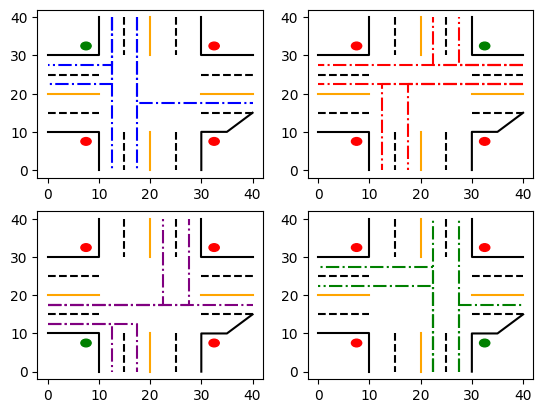

In [ ]:
def show_all_routes():

    fig, axs = plt.subplots(2, 2)

    
    plot_map(axs[0, 0])
    plot_semaforos(axs[0, 0], 0, "green")
    for r in top_routes:
        axs[0, 0].plot(r.x, r.y, "blue", linestyle="-.")

    plot_map(axs[0, 1])
    plot_semaforos(axs[0, 1], 1, "green")
    for r in right_routes:
        axs[0, 1].plot(r.x, r.y, "red", linestyle="-.")

    plot_map(axs[1, 1])
    plot_semaforos(axs[1, 1], 2, "green")
    for r in bot_routes:
        axs[1, 1].plot(r.x, r.y, "green", linestyle="-.")

    plot_map(axs[1, 0])
    plot_semaforos(axs[1, 0], 3, "green")
    for r in left_routes:
        axs[1, 0].plot(r.x, r.y, "purple", linestyle="-.")

show_all_routes()